<h1> Laboratorio 7 PDS </h1>
<h2> José David González Henao </h2>
<h3><strong>1. Transformada Rápida de Fourier para señales discretas </strong></h3>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def dftmatrix(N, Nfft):
    ##Construye matriz de transformación
    k = np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j*2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)    

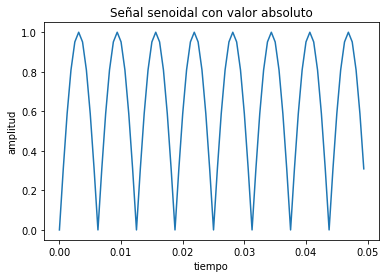

In [31]:
C = 7
f = (C + 1)*10
fs = f*20
t = np.arange(0, 0.05, 1/fs)
y = np.abs((np.sin(2*np.pi*f*t)))
plt.plot(t, y)
plt.title("Señal senoidal con valor absoluto")
plt.xlabel("tiempo")
plt.ylabel("amplitud")
plt.show()

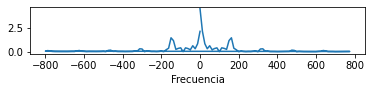

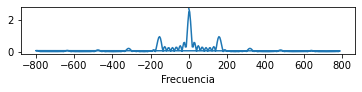

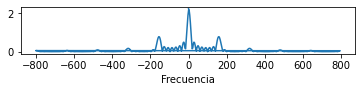

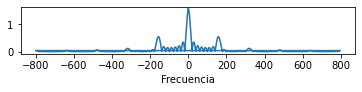

In [46]:
count = 411
for nfft in [128, 356, 512, 1024]:
    y.shape = (len(y), 1)
    U = dftmatrix(len(y), nfft)
    Yf = U.H*y[:]
    freq = np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft
    plt.subplot(count)
    plt.plot(freq, np.abs(Yf))
    plt.xlabel('Frecuencia')
    plt.show()
    count += 1



<p> La variacion más grande se ve en la resolución de la transformada de Fourier, se logra ver mejor las frecuencias</p>

C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


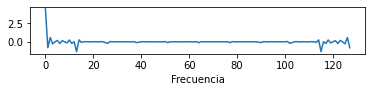

C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


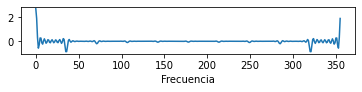

C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


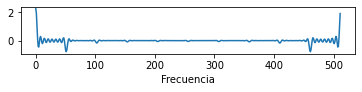

C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


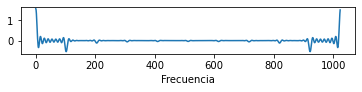

In [47]:
count = 411
for nfft in [128, 356, 512, 1024]:
    y.shape = (len(y), 1)
    U = dftmatrix(len(y), nfft)
    Yf = U.H*y[:]
    freq = np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft
    inversa = np.fft.ifft(Yf)
    plt.subplot(count)
    plt.plot(inversa)
    plt.xlabel('Frecuencia')
    plt.show()
    count += 1

<p> Se puede ver que la transformada inversa tiene un problema, que en si la señal está los extremos y hay un pico en los extremos pero se puede ver que en si la señal se puede recuperar con un procesado posterior </p>

<h3>2. Modulación PSK </h3>

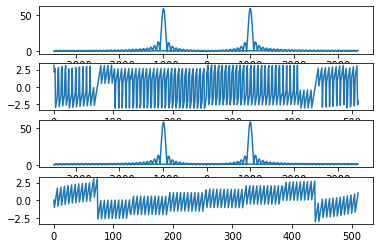

In [67]:
trama = ["00110100"]
Eb = 1
Tb = 0.002
fc = 1000
fs = 7000
t = np.arange(0, 0.5, 1/fs)
s0 = np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc*t + np.pi)
s1 = np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc*t)

nfft = 512
s0.shape = (len(s0), 1)
U = dftmatrix(len(s0), nfft)
S0f = U.H*s0[:]
amp0 = np.abs(S0f)
fase0 = np.angle(S0f)
freq0 = np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft

s1.shape = (len(s1), 1)
U = dftmatrix(len(s1), nfft)
S1f = U.H*s1[:]
amp1 = np.abs(S1f)
fase1 = np.angle(S1f)
freq1 = np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft

plt.subplot(411)
plt.plot(freq0, amp0)
plt.subplot(412)
plt.plot(fase0)
plt.subplot(413)
plt.plot(freq1, amp1)
plt.subplot(414)
plt.plot(fase1)
plt.show()

<p> Se puede ver que en amplitud son iguales esencialmente, la diferencia radica en la fase, tal como se ve en la representación en el tiempo, por lo que vemos que hay una diferencia en la amplitud en las fases notable, lo que corresponde al retraso de $\pi$ dado por la descripcion en el tiempo </p>

In [54]:
senal = np.concatenate((s0, s0, s1, s1, s0, s1, s0, s0))

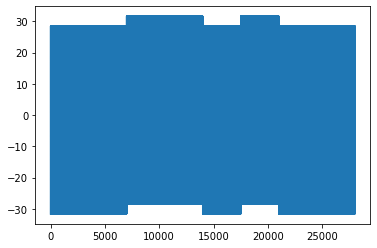

In [55]:
plt.plot(senal)

<p> Se logra diferenciar los 0, ya que los bloques que están más hacia abajo son 0s, y los que están más arriba son 1s </p>

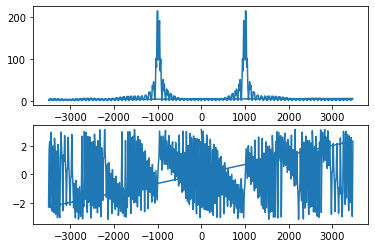

In [68]:
senal.shape = (len(senal), 1)
U = dftmatrix(len(senal), nfft)
senalf = U.H*senal[:]
ampf = np.abs(senalf)
fasef = np.angle(senalf)
freqs = np.hstack((np.arange(0, nfft/2-1), np.arange(-nfft/2, 1)))*fs/nfft
plt.subplot(211)
plt.plot(freqs, ampf)
plt.subplot(212)
plt.plot(freqs, fasef)

<p> Se puede apreciar en el diagrama de fase que está dividido por grupos, donde presuntamente los grupos con mayores cambios son cuando hay un cambio de 1 a 0 o de 0 a 1, mientras que en el de amplitud no se logra ver mucho </p>

<h2> Conclusiones </h2>
<p> Se puede concluir en la primera parte que la transformada de Fourier Rápida da resultados diferentes a la transformada Discreta de Fourier, y que su resolución depende del número de puntos que se le den, esto es bastante intuitivo, y entre más puntos más cercana será la transformada discreta de Fourier. En la transformada inversa rápida si se logra visualizar la diferencia, ya que la señal no es replicada completamnete y requiere de un procesamiento de las señales, elimanando valores DC y organizando el vector. Esto es presuntamente por la IFFT no por la FFT ya que esta última si tiene valores muy parecidos a la DFT. <br> En la modulución PSK se puede ver que es una buena manera de modular una señal y que evidentemente es resistente al ruido aditivo, ya que es una modulación de fase. Se puede vislumbrar cuáles son los bits en su representación temporal. Es una excelente alternativa a la modulación FM, siendo la modulación PSK más certera al ser digital pero también requiriendo de un mayor ancho de banda por lo mismo. Se puede ver que lo que se sospechaba intuitivamente (que depende de la fase), se comprueba, ya que la diferencia entre $s_0$ y $s_1$ se ve es en la fase, su diagrama de amplitud es el mismo, y al tener la señal final también se logra ver que el diagrama de amplitud es casi igual al de las dos señales individuales </p>